## Signal Pre-Processing

This code takes the raw PPG data and creates a virtual PPG wave. This is used as an input for MST Map code and serves as ground truth vPPG data when testing the model. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import signal
from scipy.signal import find_peaks
import os
import glob

In [12]:
subjects = []
# os.chdir() Change directory if ground truth files are saved in a different folder
path = os.getcwd()
subjects = glob.glob(os.path.join(path,"/subject*/ground_truth.txt"))


In [13]:
def create_vPPG(ppg_signal, fps):
    length_data = len(ppg_signal)
    max_freq = 160  
    max_num_peaks = ((length_data/fps)/60)*max_freq
    min_distance = length_data/max_num_peaks 
    peaks = find_peaks(ppg_signal, distance=min_distance-1)
    peaks_index = peaks[0]
    #peaks_index = interbeats_analysis(df.loc[0],30)
    
    result = np.zeros(len(df.loc[0]))
    for i in range(len(peaks_index)-1):
        x = np.arange(peaks_index[i],peaks_index[i+1])
        angle = (2*math.pi*(x-peaks_index[i]))/(peaks_index[i+1]-peaks_index[i])
        vPPG = np.cos(angle)  
        #result.extend(vPPG)
        result[peaks_index[i]:peaks_index[i+1]] = vPPG
        
        
    N = 1 #order
    fnyq = 60/2;                                                       
    lo = 4/fnyq;
    hi = 0.67/fnyq;
    [B, A] = signal.butter(N, [hi, lo], btype='bandpass')
    #print(B, A)
    filtered_data = signal.filtfilt(B, A, result)
    #plt.plot(filtered_data)
    #print(len(filtered_data))
    return filtered_data


/var/folders/4y/l161chys2ng8s9j6mq3g7trr0000gn/T/ipykernel_57850/2688593618.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,3))


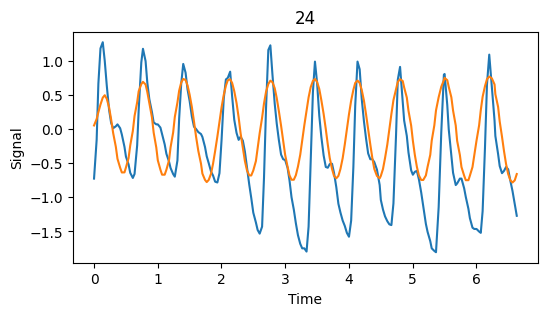

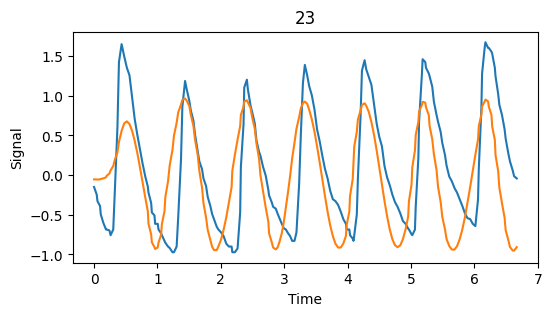

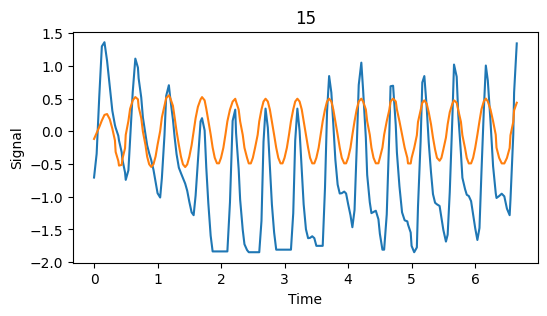

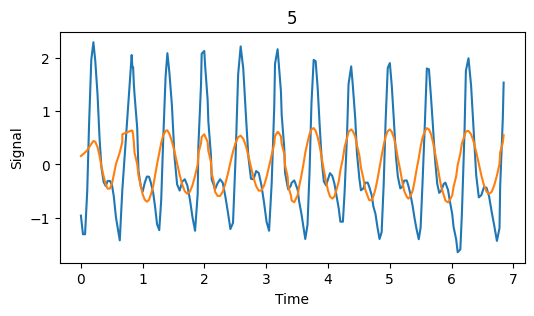

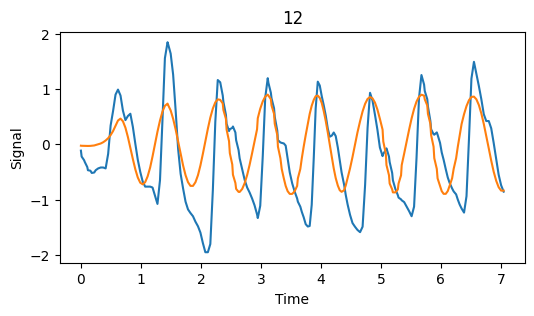

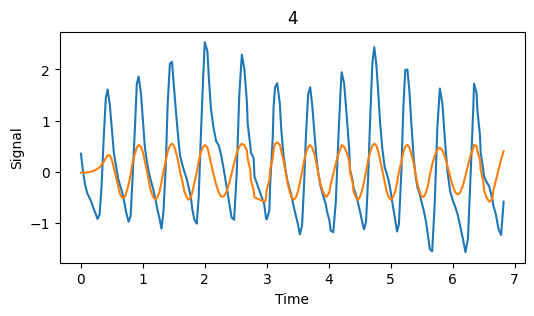

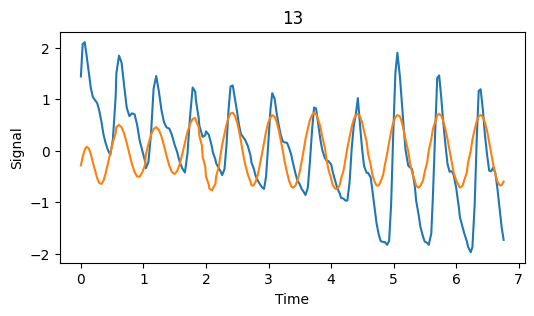

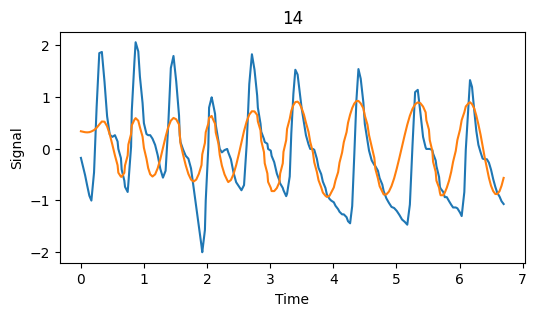

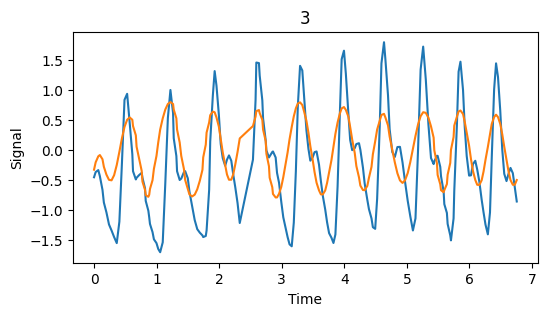

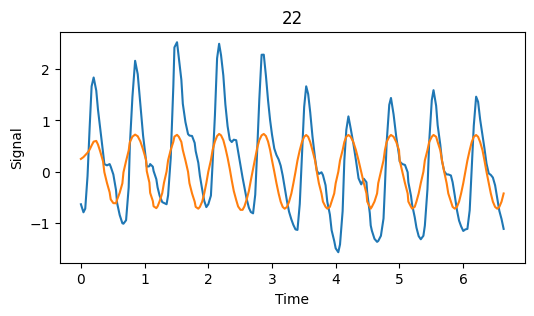

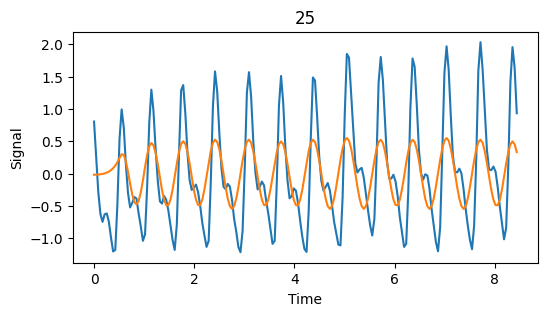

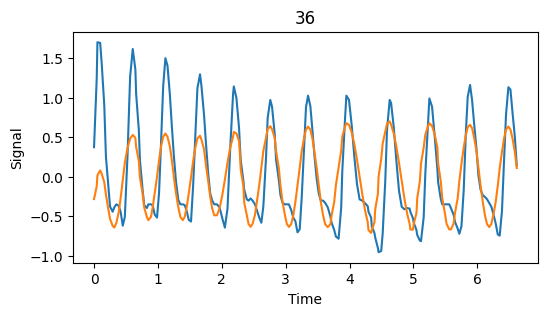

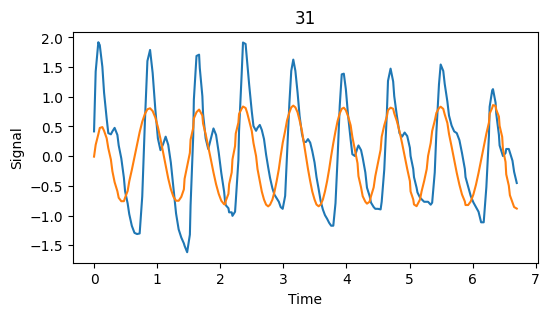

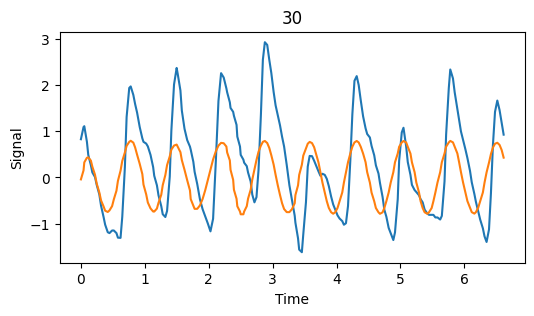

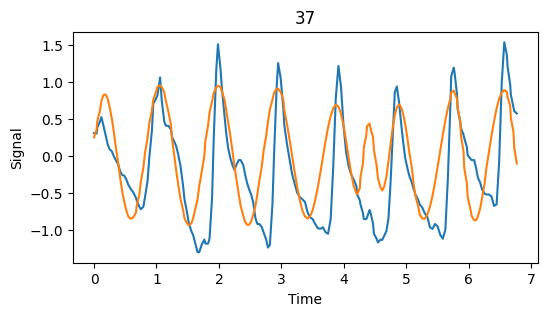

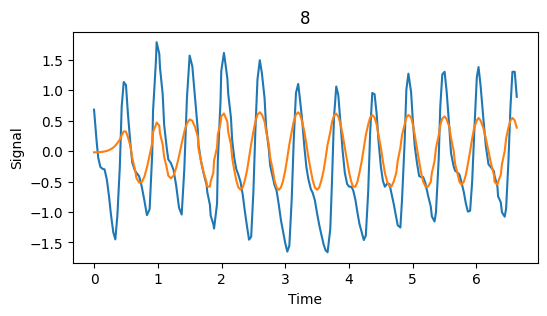

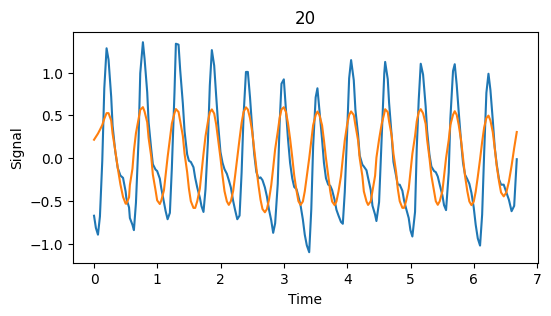

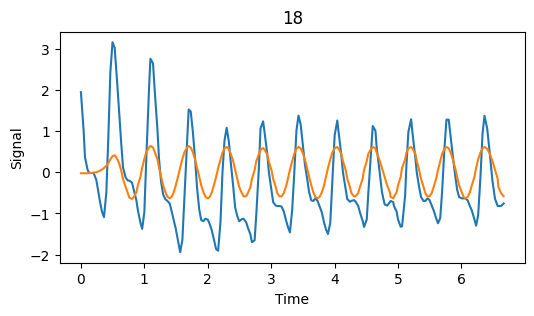

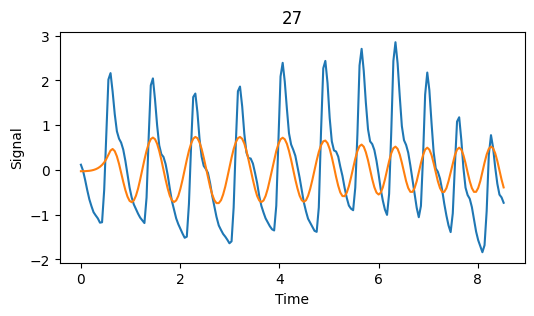

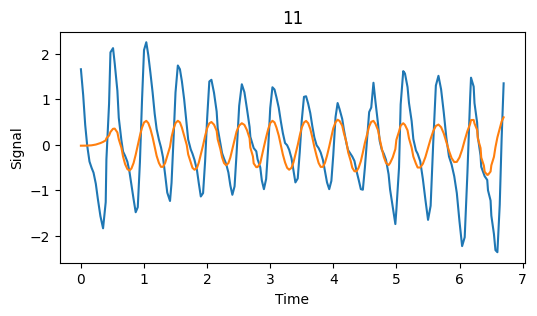

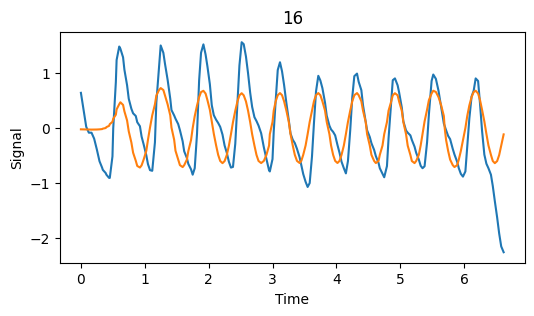

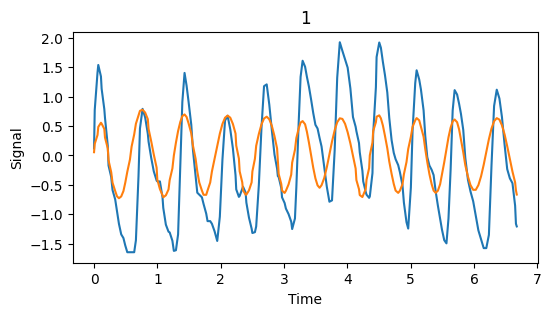

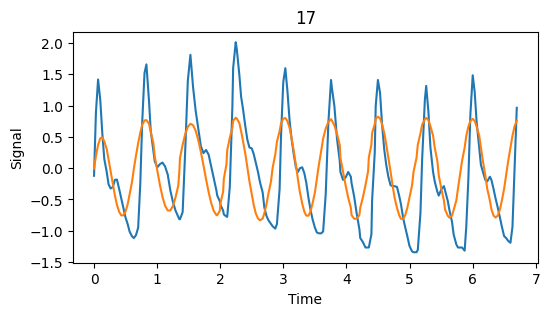

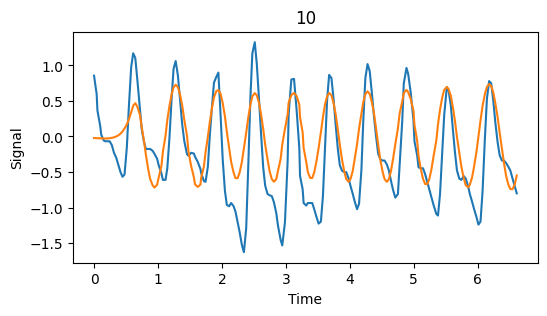

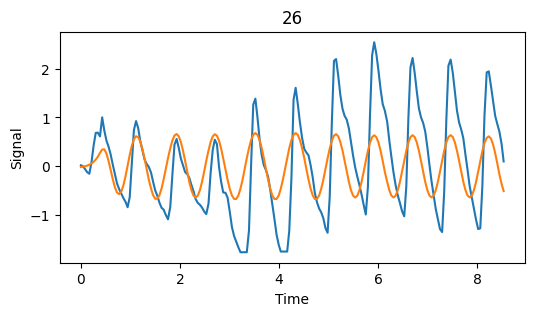

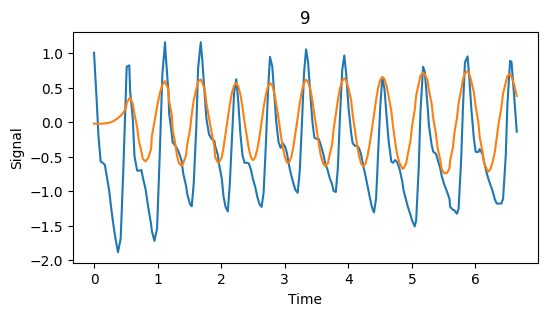

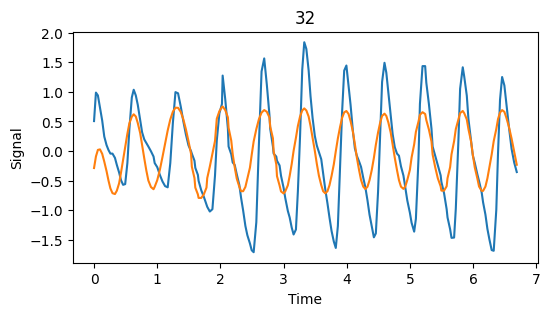

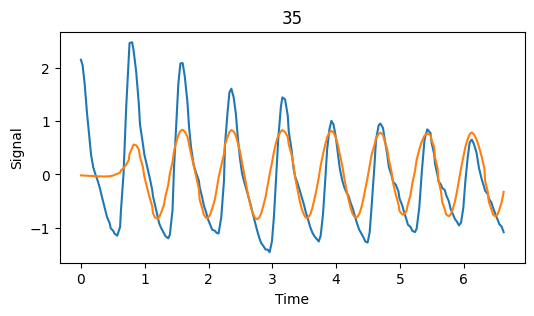

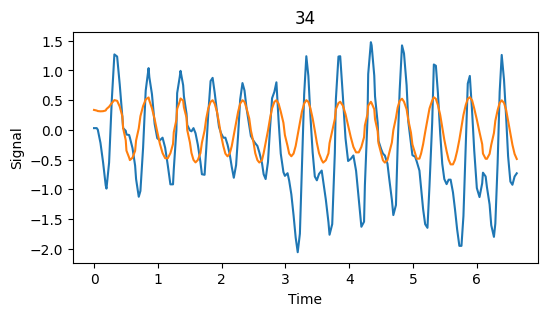

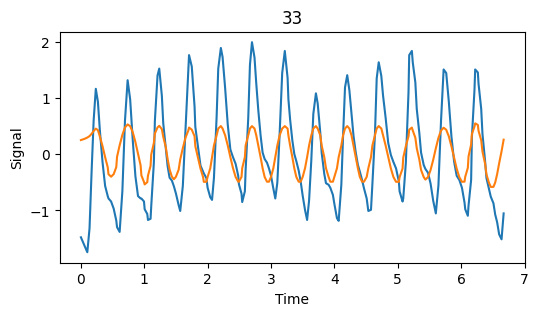

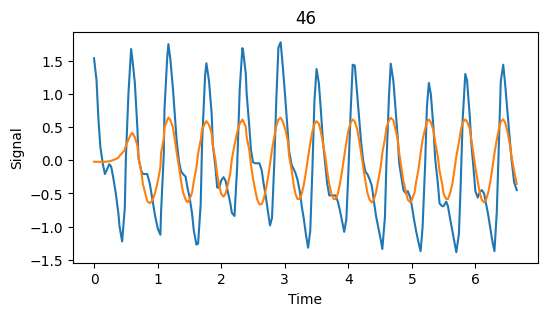

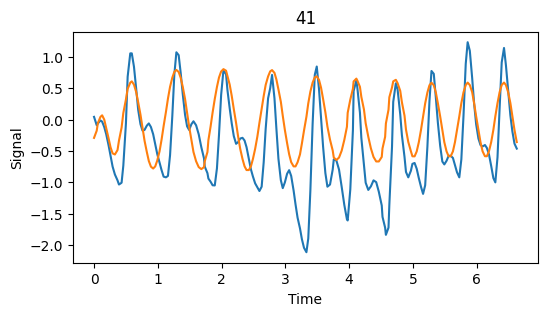

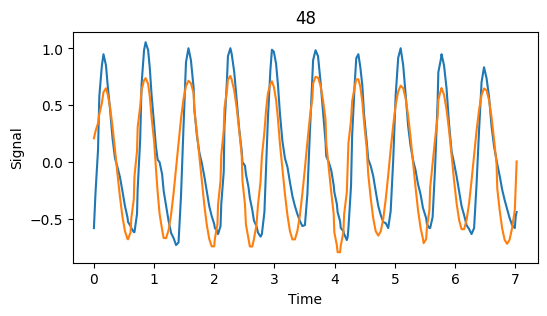

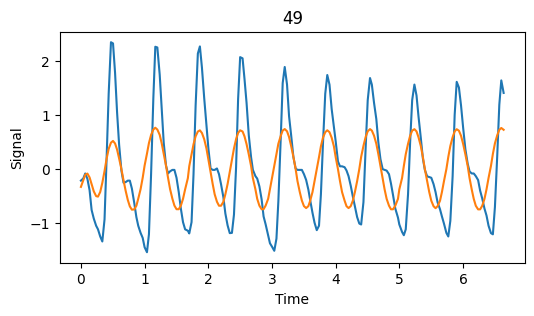

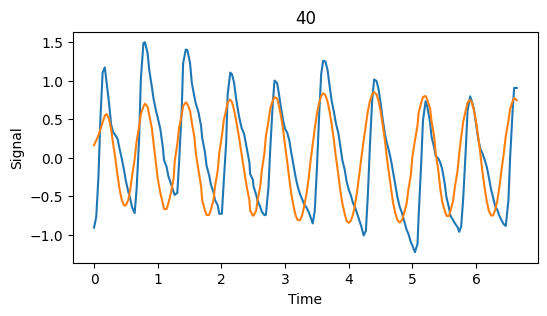

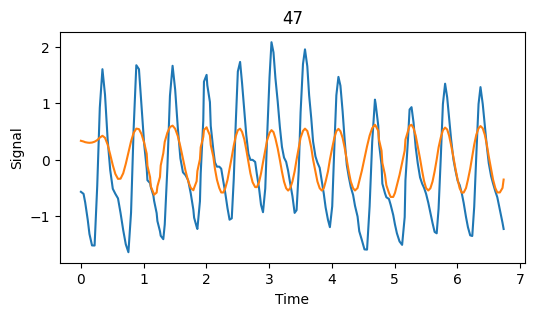

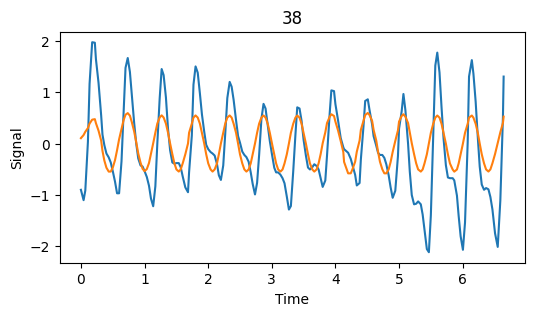

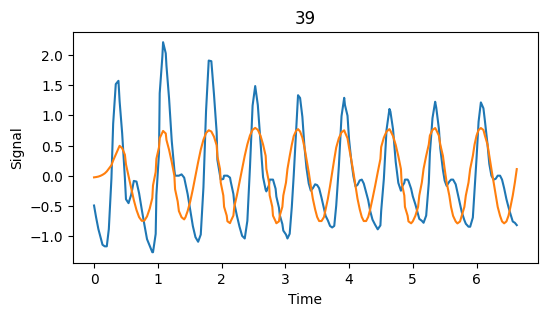

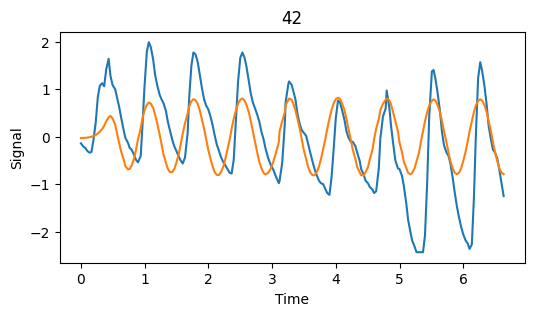

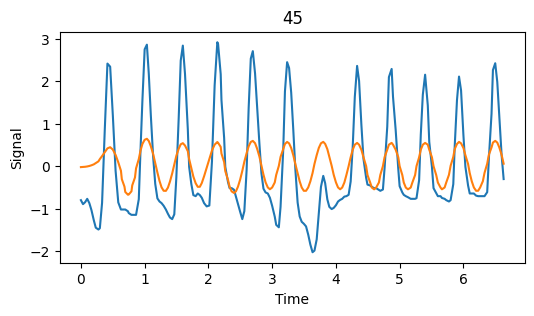

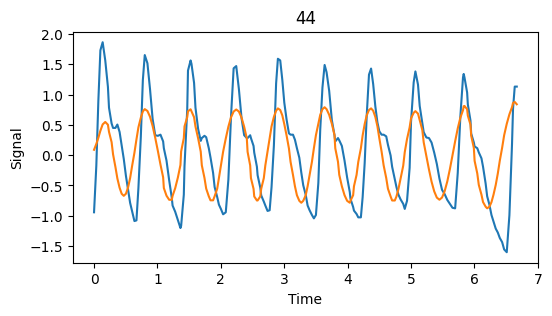

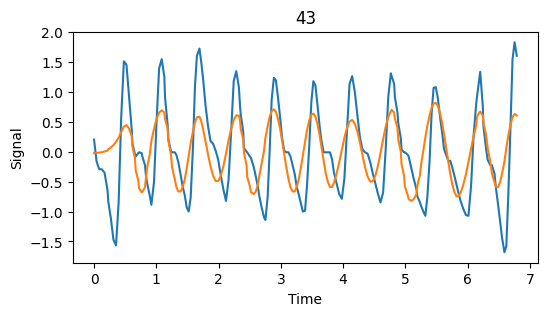

In [20]:
for i in subjects:
    subject_number = i[-19:-17]
    try:
        subject_number = subject_number.replace('t','')
    except:
        pass
    #print(i)

    df = pd.read_csv(i, delim_whitespace=True, header = None,dtype={'numbers': float})
    ppg_signal = df.loc[0]
    times = df.loc[2]
    filtered_data = create_vPPG(ppg_signal, 30)
    #Plots to Test Output
    #plt.figure(figsize=(6,3)) 
    #plt.plot(times[0:200],ppg_signal[0:200])
    #plt.plot(times[0:200],filtered_data[0:200])
    #plt.title(subject_number)
    #plt.xlabel("Time")
    #plt.ylabel("Signal")

    directory = f"/Landmarks/{subject_number}"
    make_path = os.path.join(path,directory)
    print(f'{make_path}/vPPG.csv') #use as a check
    np.savetxt(f'{make_path}/vPPG.csv',filtered_data,delimiter=',')